# A From Scratch 3 Layer Neural Networks Example

A farmer in Italy was having a problem with his labelling machine: it mixed up the labels of three wine cultivars. Now he has 178 bottles left, and nobody knows which cultivar made them! To help this poor man, we will build a classifier that recognizes the wine based on 13 attributes of the wine.

https://medium.freecodecamp.org/building-a-3-layer-neural-network-from-scratch-99239c4af5d3

An input layer, x
An arbitrary amount of hidden layers
An output layer, ŷ
A set of weights and biases between each layer, W and b
A choice of activation function for each hidden layer, σ. 


In short:

The input layer (x) consists of 178 neurons (rows of data).
A1, the first layer, consists of 8 neurons.
A2, the second layer, consists of 5 neurons.
A3, the third and output layer, consists of 3 neurons (columns of data).

Takes inputs as a matrix (2D array of numbers)

Multiplies the input by a set weights (performs a dot product aka matrix multiplication)

Applies an activation function

Returns an output

Error is calculated by taking the difference from the desired output from the data and the predicted output. This creates our gradient descent, which we can use to alter the weights

The weights are then altered slightly according to the error.

Before we can use our weights, we have to initialize them. Because we don’t have values to use for the weights yet, we use random values between 0 and 1.

In [1]:
#importing all the libraries and dataset
import pandas as pd
import numpy as np


#First we are importing all the libraries

# Package imports
# Matplotlib is a matlab like plotting library
import matplotlib
import matplotlib.pyplot as plt
# SciKitLearn is a useful machine learning utilities library
import sklearn
# The sklearn dataset module helps generating datasets
import sklearn.datasets
import sklearn.linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('./data/Wine.csv')
df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cultivar 1,Cultivar 2,Cultivar 3
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1,0,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1,0,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1,0,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1,0,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1,0,0


In [3]:
# we define our x and y here.

# Get labels
y = df[['Cultivar 1', 'Cultivar 2', 'Cultivar 3']].values

# Get inputs; 
X = df.drop(['Cultivar 1', 'Cultivar 2', 'Cultivar 3'], axis = 1)
print(X.shape, y.shape) # Print shapes just to check
X = X.values

(178, 13) (178, 3)


In [4]:
np.random.seed(0)

In [5]:
# Now we define all our functions

# Since this is a multi-class classification problem (we have 3 output labels), 
    # we will use the softmax function for the output layer — A3 — 
    # because this will compute the probabilities for the classes by spitting out a value between 0 and 1.
def softmax(z):
    #Calculate exponent term first
    exp_scores = np.exp(z)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

def softmax_loss(y,y_hat):
    # Clipping value
    minval = 0.000000000001
    # Number of samples
    m = y.shape[0]
    # Loss formula, note that np.sum sums up the entire matrix and therefore does the job of two sums from the formula
    loss = -1/m * np.sum(y * np.log(y_hat.clip(min=minval)))
    return loss

def loss_derivative(y,y_hat):
    return (y_hat-y)


# hyperbolic tangent (tanh) activation function. Can be otherfunctions like sigmoid.
# For this model, we chose to use the tanh activation function for our two hidden layers — A1 and A2 — 
    # which gives us an output value between 0 and -1.
def tanh_derivative(x): 
    return (1 - np.power(x, 2))

# This is the forward propagation function
def forward_prop(model,a0):
    
    #Start Forward Propagation
    
    # Load parameters from model
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'], model['W3'],model['b3']
    
    # Do the first Linear step 
    # Z1 is the input layer x times the dot product of the weights + our bias b
    z1 = a0.dot(W1) + b1
    
    # Put it through the first activation function. Also called as transfer function.
    a1 = np.tanh(z1)
    
    # Second linear step
    z2 = a1.dot(W2) + b2
    
    # Second activation function
    a2 = np.tanh(z2)
    
    #Third linear step
    z3 = a2.dot(W3) + b3
    
    #For the Third linear activation function we use the softmax function, 
        #either the sigmoid of softmax should be used for the last layer
    a3 = softmax(z3)
    
    #Store all results in these values
    cache = {'a0':a0,'z1':z1,'a1':a1,'z2':z2,'a2':a2,'a3':a3,'z3':z3}
    return cache

# This is the BACKWARD PROPAGATION function
def backward_prop(model,cache,y):

    # Load parameters from model
    W1, b1, W2, b2, W3, b3 = model['W1'], model['b1'], model['W2'], model['b2'],model['W3'],model['b3']
    
    # Load forward propagation results
    a0,a1, a2,a3 = cache['a0'],cache['a1'],cache['a2'],cache['a3']
    
    # Get number of samples
    m = y.shape[0]
    
    # Calculate loss derivative with respect to output
    dz3 = loss_derivative(y=y,y_hat=a3)

    # Calculate loss derivative with respect to second layer weights
    dW3 = 1/m*(a2.T).dot(dz3) #dW2 = 1/m*(a1.T).dot(dz2) 
    
    # Calculate loss derivative with respect to second layer bias
    db3 = 1/m*np.sum(dz3, axis=0)
    
    # Calculate loss derivative with respect to first layer
    dz2 = np.multiply(dz3.dot(W3.T) ,tanh_derivative(a2))
    
    # Calculate loss derivative with respect to first layer weights
    dW2 = 1/m*np.dot(a1.T, dz2)
    
    # Calculate loss derivative with respect to first layer bias
    db2 = 1/m*np.sum(dz2, axis=0)
    
    dz1 = np.multiply(dz2.dot(W2.T),tanh_derivative(a1))
    
    dW1 = 1/m*np.dot(a0.T,dz1)
    
    db1 = 1/m*np.sum(dz1,axis=0)
    
    # Store gradients
    grads = {'dW3':dW3, 'db3':db3, 'dW2':dW2,'db2':db2,'dW1':dW1,'db1':db1}
    return grads

After we forward propagate through our NN, we backward propagate our error gradient to update our weight parameters. We know our error, and want to minimize it as much as possible.

We do this by taking the derivative of the error function, with respect to the weights (W) of our NN, using gradient descent.

In [6]:
#TRAINING PHASE
def initialize_parameters(nn_input_dim,nn_hdim,nn_output_dim):
    # First layer weights
    W1 = 2 *np.random.randn(nn_input_dim, nn_hdim) - 1
    
    # First layer bias
    b1 = np.zeros((1, nn_hdim))
    
    # Second layer weights
    W2 = 2 * np.random.randn(nn_hdim, nn_hdim) - 1
    
    # Second layer bias
    b2 = np.zeros((1, nn_hdim))
    W3 = 2 * np.random.rand(nn_hdim, nn_output_dim) - 1
    b3 = np.zeros((1,nn_output_dim))
    
    
    # Package and return model
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2,'W3':W3,'b3':b3}
    return model

a neural network will have to undergo many epochs or iterations to give us an accurate prediction.

you have to specify a “learning rate” for the model. The learning rate is the multiplier to update the parameters. It determines how rapidly they can change. If the learning rate is low, training will take longer. However, if the learning rate is too high, we might miss a minimum.
a:= a - a* dL(w)/da

:= means that this is a definition, not an equation or proven statement.
a is the learning rate called alpha
dL(w) is the derivative of the total loss with respect to our weight w
da is the derivative of alpha

We chose a learning rate of 0.07 after some experimenting.

In [7]:
def update_parameters(model,grads,learning_rate):
    # Load parameters
    W1, b1, W2, b2,b3,W3 = model['W1'], model['b1'], model['W2'], model['b2'],model['b3'],model["W3"]
    
    # Update parameters
    W1 -= learning_rate * grads['dW1']
    b1 -= learning_rate * grads['db1']
    W2 -= learning_rate * grads['dW2']
    b2 -= learning_rate * grads['db2']
    W3 -= learning_rate * grads['dW3']
    b3 -= learning_rate * grads['db3']
    
    # Store and return parameters
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3':W3,'b3':b3}
    return model
def predict(model, x):
    # Do forward pass
    c = forward_prop(model,x)
    #get y_hat
    y_hat = np.argmax(c['a3'], axis=1)
    return y_hat
def calc_accuracy(model,x,y):
    # Get total number of examples
    m = y.shape[0]
    # Do a prediction with the model
    pred = predict(model,x)
    # Ensure prediction and truth vector y have the same shape
    pred = pred.reshape(y.shape)
    # Calculate the number of wrong examples
    error = np.sum(np.abs(pred-y))
    # Calculate accuracy
    return (m - error)/m * 100
losses = []
def train(model,X_,y_,learning_rate, epochs=20000, print_loss=False):
    # Gradient descent. Loop over epochs
    for i in range(0, epochs):

        # Forward propagation
        cache = forward_prop(model,X_)
        #a1, probs = cache['a1'],cache['a2']
        # Backpropagation
        
        grads = backward_prop(model,cache,y_)
        # Gradient descent parameter update
        # Assign new parameters to the model
        model = update_parameters(model=model,grads=grads,learning_rate=learning_rate)
    
        # Pring loss & accuracy every 100 iterations
        if print_loss and i % 100 == 0:
            a3 = cache['a3']
            print('Loss after iteration',i,':',softmax_loss(y_,a3))
            y_hat = predict(model,X_)
            y_true = y_.argmax(axis=1)
            print('Accuracy after iteration',i,':',accuracy_score(y_pred=y_hat,y_true=y_true)*100,'%')
            losses.append(accuracy_score(y_pred=y_hat,y_true=y_true)*100)
    return model

Loss after iteration 0 : 1.4504813381979211
Accuracy after iteration 0 : 25.280898876404496 %
Loss after iteration 100 : 0.5255210272876467
Accuracy after iteration 100 : 80.89887640449437 %
Loss after iteration 200 : 0.3964222056044325
Accuracy after iteration 200 : 86.51685393258427 %
Loss after iteration 300 : 0.34694059691857543
Accuracy after iteration 300 : 87.64044943820225 %
Loss after iteration 400 : 0.32062505328047924
Accuracy after iteration 400 : 89.32584269662921 %
Loss after iteration 500 : 0.30057660926569424
Accuracy after iteration 500 : 89.32584269662921 %
Loss after iteration 600 : 0.2775754239020053
Accuracy after iteration 600 : 89.8876404494382 %
Loss after iteration 700 : 0.25803463679942457
Accuracy after iteration 700 : 90.4494382022472 %
Loss after iteration 800 : 0.24518960914662333
Accuracy after iteration 800 : 90.4494382022472 %
Loss after iteration 900 : 0.23453472996993882
Accuracy after iteration 900 : 90.4494382022472 %
Loss after iteration 1000 : 0.2

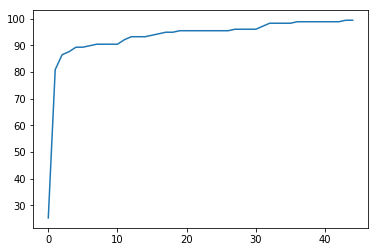

In [8]:
np.random.seed(0)
# This is what we return at the end
model = initialize_parameters(nn_input_dim=13, nn_hdim= 5, nn_output_dim= 3)
model = train(model,X,y,learning_rate=0.07,epochs=4500,print_loss=True)
plt.plot(losses)

We start by feeding data into the neural network and perform several matrix operations on this input data, layer by layer. For each of our three layers, we take the dot product of the input by the weights and add a bias. Next, we pass this output through an activation function of choice.

The output of this activation function is then used as an input for the following layer to follow the same procedure. This process is iterated three times since we have three layers. Our final output is y-hat, which is the prediction on which wine belongs to which cultivar. This is the end of the forward propagation process.

We then calculate the difference between our prediction (y-hat) and the expected output (y) and use this error value during backpropagation.

During backpropagation, we take our error — the difference between our prediction y-hat and y — and we mathematically push it back through the NN in the other direction. We are learning from our mistakes.

By taking the derivative of the functions we used during the first process, we try to discover what value we should give the weights in order to achieve the best possible prediction. Essentially we want to know what the relationship is between the value of our weight and the error that we get out as the result.

And after many epochs or iterations, the NN has learned to give us more accurate predictions by adapting its parameters to our dataset.